# Bigrams

We want to learn something from a dataset of words.
First of all, we need a machine which generates these data (the so-called words).

In [27]:
words = open('names.txt').read().splitlines()

In [28]:
import random
random.seed(154)
random.shuffle(words)
words[:10]

['tappezzando',
 'triossido',
 'capirsi',
 'oscillografico',
 'promisero',
 'elargendo',
 'benediciate',
 'ammezzato',
 'prevenendo',
 'marinista']

Preprocessing the dataset removing accents and composite words

In [29]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

t a
a p
p p
p e
e z
z z
z a
a n
n d
d o


In [30]:
print(w)
list(w)
print(w[1:])

tappezzando
appezzando


In [31]:
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<S>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> t
t a
a p
p p
p e
e z
z z
z a
a n
n d
d o
o <S>
<S> t
t r
r i
i o
o s
s s
s i
i d
d o
o <S>
<S> c
c a
a p
p i
i r
r s
s i
i <S>


How many often does a bigram happen?

In [32]:
b = {}
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1
print(b)

{('<S>', 't'): 2, ('t', 'a'): 1, ('a', 'p'): 2, ('p', 'p'): 1, ('p', 'e'): 1, ('e', 'z'): 1, ('z', 'z'): 1, ('z', 'a'): 1, ('a', 'n'): 1, ('n', 'd'): 1, ('d', 'o'): 2, ('o', '<E>'): 2, ('t', 'r'): 1, ('r', 'i'): 1, ('i', 'o'): 1, ('o', 's'): 1, ('s', 's'): 1, ('s', 'i'): 2, ('i', 'd'): 1, ('<S>', 'c'): 1, ('c', 'a'): 1, ('p', 'i'): 1, ('i', 'r'): 1, ('r', 's'): 1, ('i', '<E>'): 1}


We can do it for all words

In [33]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1
print(b)

{('<S>', 't'): 5166, ('t', 'a'): 11819, ('a', 'p'): 2590, ('p', 'p'): 1705, ('p', 'e'): 3796, ('e', 'z'): 1077, ('z', 'z'): 4329, ('z', 'a'): 4688, ('a', 'n'): 17091, ('n', 'd'): 10098, ('d', 'o'): 9299, ('o', '<E>'): 40782, ('t', 'r'): 8645, ('r', 'i'): 15174, ('i', 'o'): 10684, ('o', 's'): 4985, ('s', 's'): 4521, ('s', 'i'): 6307, ('i', 'd'): 2741, ('<S>', 'c'): 8291, ('c', 'a'): 10226, ('p', 'i'): 3814, ('i', 'r'): 2940, ('r', 's'): 1024, ('i', '<E>'): 3542, ('<S>', 'o'): 2829, ('s', 'c'): 5698, ('c', 'i'): 6865, ('i', 'l'): 5886, ('l', 'l'): 4977, ('l', 'o'): 5198, ('o', 'g'): 3367, ('g', 'r'): 2132, ('r', 'a'): 14514, ('a', 'f'): 1759, ('f', 'i'): 3576, ('i', 'c'): 12681, ('c', 'o'): 12447, ('<S>', 'p'): 8047, ('p', 'r'): 3499, ('r', 'o'): 8884, ('o', 'm'): 4040, ('m', 'i'): 4229, ('i', 's'): 9454, ('s', 'e'): 4260, ('e', 'r'): 12189, ('<S>', 'e'): 3777, ('e', 'l'): 4684, ('l', 'a'): 7744, ('a', 'r'): 14280, ('r', 'g'): 985, ('g', 'e'): 2224, ('e', 'n'): 11368, ('<S>', 'b'): 4259,

We now want to construct a machine which tells us the probability of the next character
Let's sort all by frequency

In [34]:
sorted(b.items(), key=lambda z: -z[1])

[(('o', '<E>'), 40782),
 (('e', '<E>'), 27111),
 (('a', '<E>'), 19088),
 (('t', 'o'), 18472),
 (('a', 't'), 17443),
 (('a', 'n'), 17091),
 (('r', 'e'), 17011),
 (('r', 'i'), 15174),
 (('r', 'a'), 14514),
 (('a', 'r'), 14280),
 (('i', 'n'), 14065),
 (('i', 'a'), 13442),
 (('i', 'c'), 12681),
 (('o', 'n'), 12529),
 (('c', 'o'), 12447),
 (('e', 'r'), 12189),
 (('<S>', 's'), 11939),
 (('t', 'a'), 11819),
 (('e', 'n'), 11368),
 (('n', 't'), 10885),
 (('t', 'e'), 10854),
 (('i', 'o'), 10684),
 (('<S>', 'a'), 10680),
 (('c', 'a'), 10226),
 (('t', 'i'), 10172),
 (('n', 'd'), 10098),
 (('o', 'r'), 9469),
 (('i', 's'), 9454),
 (('l', 'i'), 9407),
 (('d', 'o'), 9299),
 (('s', 't'), 9144),
 (('r', 'o'), 8884),
 (('<S>', 'i'), 8673),
 (('t', 'r'), 8645),
 (('n', 'a'), 8496),
 (('a', 'l'), 8456),
 (('o', 'l'), 8418),
 (('<S>', 'c'), 8291),
 (('<S>', 'p'), 8047),
 (('n', 'e'), 7941),
 (('l', 'e'), 7749),
 (('l', 'a'), 7744),
 (('t', 't'), 7159),
 (('c', 'i'), 6865),
 (('i', 't'), 6830),
 (('<S>', 'r'

Now we want to code this information
Let's take only the unique elements of a word, then of all words, i.e. our finite alphabet

In [35]:
w = set(list(words[1]))
w

{'d', 'i', 'o', 'r', 's', 't'}

In [36]:
chars = sorted(list(set(''.join(words))))
chars

["'",
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'à',
 'â',
 'ç',
 'è',
 'é',
 'ì',
 'ò',
 'ô',
 'ù']

At this point we should have about 28 characters, 26 letters, the dash for multiple names and the special character for word separation.

In [37]:
import torch

N = torch.zeros(29, 29)

In [38]:
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 27
stoi['<E>'] = 28

Now let's try to build an encoder (and a decoder ofc).

In [39]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

IndexError: index 30 is out of bounds for dimension 1 with size 29

<Axes: >

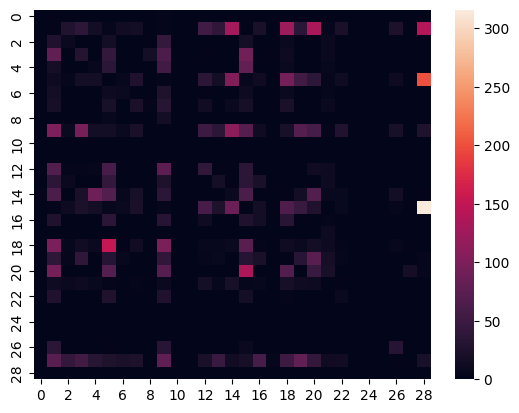

In [41]:
import seaborn as sns
sns.heatmap(N)

In [42]:
print(N[3,3])
print(N[3,3].item())

tensor(30.)
30.0


How can we use counting to infer our probability?
How can we reproduce the probability distribution of these numbers?